In [1]:
import pandas as pd
import numpy as np
from texttable import Texttable
import matplotlib.pyplot as plotting
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', None)

breast_cancer = pd.read_csv("data.csv")
breast_cancer = breast_cancer.drop(['Unnamed: 32'],axis=1)
columns_name = list(breast_cancer.columns[2:32])

print(breast_cancer.head())
print("\n")


         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

In [3]:
#CHECKING FOR NULL VALUES

full_headers = breast_cancer.columns
values = list(breast_cancer.isnull().sum())
nullList=[]
nullList.append(['Feature','Null Values count'])
for i in range(len(full_headers)):
    nullList.append([full_headers[i],values[i]])

table = Texttable()
table.add_rows(nullList)
print(table.draw())    
print("\n")

+-------------------------+-------------------+
|         Feature         | Null Values count |
+=========================+===================+
| id                      | 0                 |
+-------------------------+-------------------+
| diagnosis               | 0                 |
+-------------------------+-------------------+
| radius_mean             | 0                 |
+-------------------------+-------------------+
| texture_mean            | 0                 |
+-------------------------+-------------------+
| perimeter_mean          | 0                 |
+-------------------------+-------------------+
| area_mean               | 0                 |
+-------------------------+-------------------+
| smoothness_mean         | 0                 |
+-------------------------+-------------------+
| compactness_mean        | 0                 |
+-------------------------+-------------------+
| concavity_mean          | 0                 |
+-------------------------+-------------

In [4]:
#IMPORTING DATA

predictors = breast_cancer.columns[2:31]
crux = "diagnosis"

X_s = breast_cancer.loc[:,predictors]
Y_s = np.ravel(breast_cancer.loc[:,[crux]])
X = breast_cancer.loc[:,predictors]
Y = np.ravel(breast_cancer.loc[:,[crux]])


In [5]:
#RANDOM FOREST BEFORE NORMALIZATION AND PCA - > BENCHMARK

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  cross_val_score, cross_val_predict

rf = RandomForestClassifier()
sc = cross_val_score(rf, X_s, Y_s, scoring='accuracy').mean()
print("Benchmark-> Accuracy before Norm and PCA:- %s"%round(sc*100,2))

print('Here we do not use cross-validation approach')

Benchmark-> Accuracy before Norm and PCA:- 95.78
Here we do not use cross-validation approach


{'B': 357, 'M': 212}
0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object


Text(0, 0.5, 'Total Number of Patients')

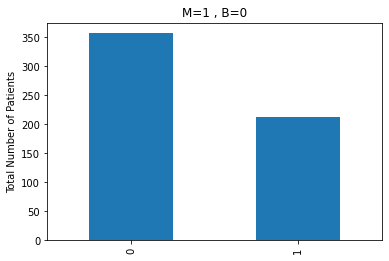

In [6]:
#CHECKING FOR CLASS IMBALANCE

from sklearn import preprocessing

imbalance = dict(breast_cancer['diagnosis'].value_counts())
print(imbalance)

print(breast_cancer['diagnosis'])
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1,'B':0})
datas = pd.DataFrame(preprocessing.scale(breast_cancer.iloc[:,1:32]))
datas.columns = list(breast_cancer.iloc[:,1:32].columns)
datas['diagnosis'] = breast_cancer['diagnosis']

datas.diagnosis.value_counts().plot(kind='bar')
plotting.title("M=1 , B=0")
plotting.ylabel("Total Number of Patients")


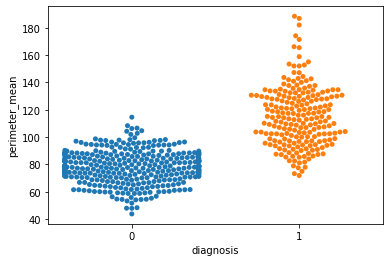

In [7]:
sns.swarmplot(y='perimeter_mean',x='diagnosis', data=breast_cancer)
plotting.show()
print("\n")

The histograms of the attributes are given below:


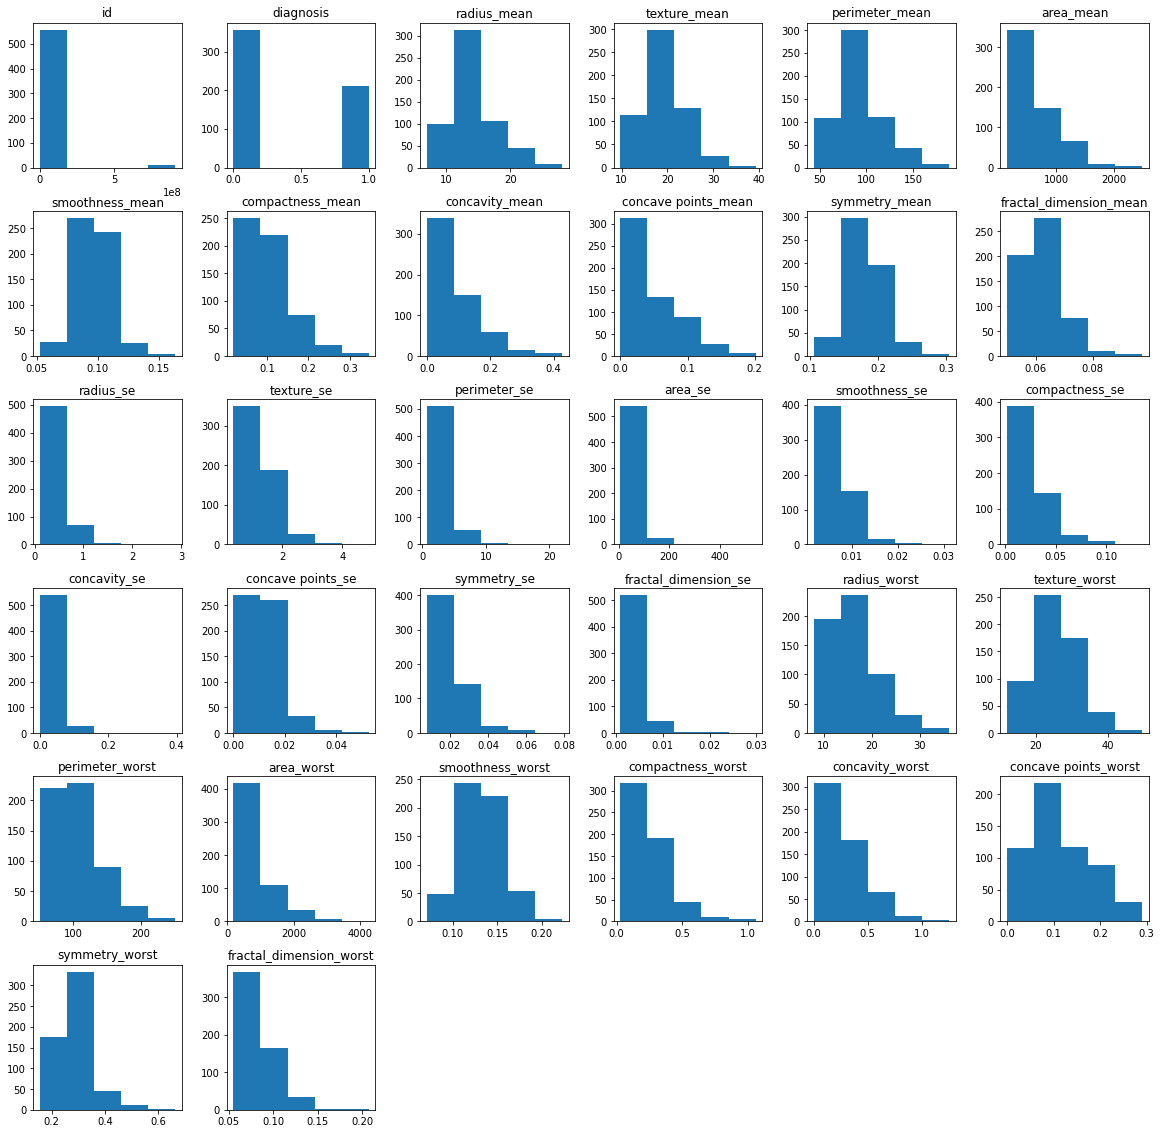

In [8]:
#CHECKING FOR NORMALISATION

print("The histograms of the attributes are given below:")
breast_cancer.hist(bins=5,grid=False,layout=[6,6],figsize=[20,20])
plotting.show()
print("\n")

The correlation heatmap is shown below:


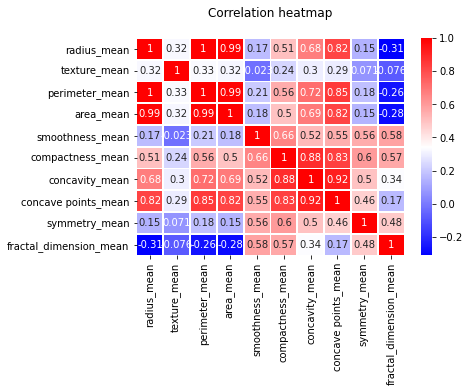

In [9]:
#CHECKING FOR CORRELATION

print("The correlation heatmap is shown below:")
b = breast_cancer
b_corr = b.drop(['id','diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se',
                 'radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'],axis=1)
correlation = b_corr.corr()
heatmap = sns.heatmap(correlation, cbar=True, annot=True, cmap="bwr", linewidths=.75)
heatmap.set_title("Correlation heatmap\n")
plotting.show()
print("\n")

In [10]:
#BEFORE FEATURE SCALING
diagnosis_values = breast_cancer['diagnosis']
breast_cancer = breast_cancer.drop(columns=['id','diagnosis'],axis=1)
headers = breast_cancer.columns
minimum = list(map(lambda x: round(x,4),breast_cancer.min()))
mean = list(map(lambda x: round(x,4),breast_cancer.mean()))
maximum = list(map(lambda x: round(x,4),breast_cancer.max()))
std =list(map(lambda x: round(x,4),breast_cancer.std()))

before_scaling=[]
before_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
for i in range(len(headers)):
    before_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

print("\nBEFORE FEATURE SCALING")
table1 = Texttable()
table1.add_rows(before_scaling)
print(table1.draw())
print("\n")



BEFORE FEATURE SCALING
+-------------------------+---------+---------+---------+----------+
|         Feature         |   Min   |  Mean   |   Max   | Std. Dev |
+=========================+=========+=========+=========+==========+
| radius_mean             | 6.981   | 14.127  | 28.110  | 3.524    |
+-------------------------+---------+---------+---------+----------+
| texture_mean            | 9.710   | 19.290  | 39.280  | 4.301    |
+-------------------------+---------+---------+---------+----------+
| perimeter_mean          | 43.790  | 91.969  | 188.500 | 24.299   |
+-------------------------+---------+---------+---------+----------+
| area_mean               | 143.500 | 654.889 | 2501    | 351.914  |
+-------------------------+---------+---------+---------+----------+
| smoothness_mean         | 0.053   | 0.096   | 0.163   | 0.014    |
+-------------------------+---------+---------+---------+----------+
| compactness_mean        | 0.019   | 0.104   | 0.345   | 0.053    |
+---------

In [11]:
#AFTER FEATURE SCALING

breast_cancer = pd.DataFrame(preprocessing.scale(breast_cancer.iloc[:,0:31]))

minimum = list(map(lambda x: round(x,4),breast_cancer.min()))
mean = list(map(lambda x: round(x,4),breast_cancer.mean()))
maximum = list(map(lambda x: round(x,4),breast_cancer.max()))
std =list(map(lambda x: round(x,4),breast_cancer.std()))

after_scaling=[]
after_scaling.append(['Feature','Min','Mean','Max','Std. Dev'])
for i in range(len(headers)):
    after_scaling.append([headers[i],minimum[i],mean[i],maximum[i],std[i]])

print("\nAFTER FEATURE SCALING")
table2 = Texttable()
table2.add_rows(after_scaling)
print(table2.draw())
print("\n")


AFTER FEATURE SCALING
+-------------------------+--------+------+--------+----------+
|         Feature         |  Min   | Mean |  Max   | Std. Dev |
+=========================+========+======+========+==========+
| radius_mean             | -2.030 | 0    | 3.971  | 1.001    |
+-------------------------+--------+------+--------+----------+
| texture_mean            | -2.229 | 0    | 4.652  | 1.001    |
+-------------------------+--------+------+--------+----------+
| perimeter_mean          | -1.984 | 0    | 3.976  | 1.001    |
+-------------------------+--------+------+--------+----------+
| area_mean               | -1.454 | 0    | 5.250  | 1.001    |
+-------------------------+--------+------+--------+----------+
| smoothness_mean         | -3.112 | 0    | 4.771  | 1.001    |
+-------------------------+--------+------+--------+----------+
| compactness_mean        | -1.610 | 0    | 4.568  | 1.001    |
+-------------------------+--------+------+--------+----------+
| concavity_mean 

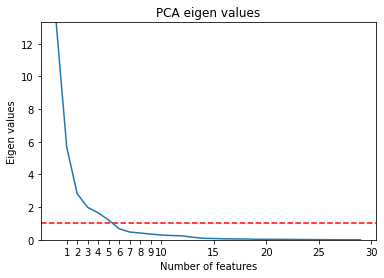

<Figure size 36000x36000 with 0 Axes>

In [12]:
#PRINCIPAL COMPONENT ANALYSIS
pca = PCA(n_components=len(breast_cancer.columns))
breast_cancer = pca.fit_transform(breast_cancer)
eigen_values = pca.explained_variance_
ratio_values = pca.explained_variance_ratio_
plotting.ylabel("Eigen values")
plotting.xlabel("Number of features")
plotting.title("PCA eigen values")
plotting.ylim(0, max(eigen_values))
plotting.xticks([1,2,3,4,5,6,7,8,9,10,15,20,25,30])
plotting.style.context('seaborn-whitegrid')
plotting.axhline(y=1,color='r',linestyle='--')
plotting.plot(eigen_values)
plotting.figure(figsize=(500,500))
plotting.show()
print("\n")


In [13]:
tableList=[]
tableList.append(["NC","SP","EV","CEV"])
for i in range(len(eigen_values)):
    total=0
    for j in range(i+1):
        total+=ratio_values[j]
    tableList.append([i+1,round(eigen_values[i],2),round(ratio_values[i],2),round(total*100,2)])

print("\nPCA Table")
table3 = Texttable()
table3.add_rows(tableList)
print(table3.draw())
print("\n")


PCA Table
+----+--------+-------+--------+
| NC |   SP   |  EV   |  CEV   |
+====+========+=======+========+
| 1  | 13.300 | 0.440 | 44.270 |
+----+--------+-------+--------+
| 2  | 5.700  | 0.190 | 63.240 |
+----+--------+-------+--------+
| 3  | 2.820  | 0.090 | 72.640 |
+----+--------+-------+--------+
| 4  | 1.980  | 0.070 | 79.240 |
+----+--------+-------+--------+
| 5  | 1.650  | 0.050 | 84.730 |
+----+--------+-------+--------+
| 6  | 1.210  | 0.040 | 88.760 |
+----+--------+-------+--------+
| 7  | 0.680  | 0.020 | 91.010 |
+----+--------+-------+--------+
| 8  | 0.480  | 0.020 | 92.600 |
+----+--------+-------+--------+
| 9  | 0.420  | 0.010 | 93.990 |
+----+--------+-------+--------+
| 10 | 0.350  | 0.010 | 95.160 |
+----+--------+-------+--------+
| 11 | 0.290  | 0.010 | 96.140 |
+----+--------+-------+--------+
| 12 | 0.260  | 0.010 | 97.010 |
+----+--------+-------+--------+
| 13 | 0.240  | 0.010 | 97.810 |
+----+--------+-------+--------+
| 14 | 0.160  | 0.010 | 98.340 |

In [14]:
#SPLITTING DATA INTO X AND Y

X = pd.DataFrame(breast_cancer, columns = columns_name)
Y = pd.DataFrame(diagnosis_values, columns = ['diagnosis'])
print(breast_cancer.shape)
print(X.shape)
print(Y.shape)


(569, 30)
(569, 30)
(569, 1)


In [15]:
#SPLITTING DATASET FOR TRANINING AND SPLITTING

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print('Original Data Set',breast_cancer.shape)
print('Shape of X training set : ',X_train.shape,' || Shape of test set : ',X_test.shape) 
print('Shape of Y training set : ',Y_train.shape,' || Shape of test set : ',Y_test.shape) 


Original Data Set (569, 30)
Shape of X training set :  (398, 30)  || Shape of test set :  (171, 30)
Shape of Y training set :  (398, 1)  || Shape of test set :  (171, 1)


In [16]:
table_report=[]
table_report.append(["Model","Acc","Prec","Recall","F1","Support"])
global count_lis
count_lis = 1

In [17]:
#PRINT FUNCTION

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

def truncate(f, n):
    return np.floor(f * 10 ** n) / 10 ** n

def evaluate(sco, model, X_train, X_test, y_train, y_test):
    global count_lis
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    acc = round(sco*100,2)
    #print(f"Accuracy %s" % round(accuracy_score(y_train, y_train_pred)*100,2))
    lisp =[]
    lisp = truncate(clf_report.mean(axis = 1).astype(float),2)
    table_report.append([count_lis,acc,lisp['precision'],lisp['recall'],lisp['f1-score'],lisp['support']])
    count_lis = count_lis+1

In [18]:
#SVM TUNING

from sklearn import svm
from sklearn.svm import SVC

svm = svm.SVC()
sc = cross_val_score(svm, X_train, Y_train, scoring='accuracy', cv=10).mean()

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
evaluate(sc, svm_clf, X_train, X_test, Y_train, Y_test)

print("SVM Tuning Accuracy :- %s" % round(sc*100,2))

scores = {
    'SVM Tuning': {
        'Train': accuracy_score(Y_train, svm_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, svm_clf.predict(X_test)),
    },
}


SVM Tuning Accuracy :- 98.0


In [19]:
#LOGISTIC REGRESSION MODEL

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
sc = cross_val_score(lr_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

lr_clf.fit(X_train, Y_train)
evaluate(sc, lr_clf, X_train, X_test, Y_train, Y_test)

scores['LogisticRegression'] = {
        'Train': accuracy_score(Y_train, lr_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, lr_clf.predict(X_test)),
    }

print("Logistic regression accuracy :- %s" % round(sc*100,2))
print(lr_clf.predict(X_test))

Logistic regression accuracy :- 97.99
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [20]:
#ADABOOST

from sklearn.ensemble import AdaBoostClassifier

#adb_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
adb_clf = AdaBoostClassifier()
sc = cross_val_score(adb_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

adb_clf.fit(X_train, Y_train)
evaluate(sc, adb_clf, X_train, X_test, Y_train, Y_test)

scores['AdaBoost'] = {
        'Train': accuracy_score(Y_train, adb_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, adb_clf.predict(X_test)),
    }

print("AdaBoost Accuracy :- %s" % round(sc*100,2))
print(adb_clf.predict(X_test))

AdaBoost Accuracy :- 95.74
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [21]:
#STOCHASTIC GRADIENT DESCENT

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sc = cross_val_score(sgd_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

sgd_clf.fit(X_train, Y_train)
evaluate(sc, sgd_clf, X_train, X_test, Y_train, Y_test)

scores['SGDC'] = {
        'Train': accuracy_score(Y_train, sgd_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, sgd_clf.predict(X_test)),
    }

print("Stochastic gradient descent Accuracy :- %s" % round(sc*100,2))

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

scaler = StandardScaler()
pipl = make_pipeline(StandardScaler(), SGDClassifier())
pipl.fit(X_train, Y_train)
print(pipl.predict(X_test))

Stochastic gradient descent Accuracy :- 96.74
[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [22]:
#PERCEPTRON

from sklearn.linear_model import Perceptron

pct_clf = Perceptron()
sc = cross_val_score(pct_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

pct_clf.fit(X_train, Y_train)
evaluate(sc, pct_clf, X_train, X_test, Y_train, Y_test)

scores['Perceptron'] = {
        'Train': accuracy_score(Y_train, pct_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, pct_clf.predict(X_test)),
    }

print("Perceptron Accuracy :- %s" % round(sc*100,2))
print(pct_clf.predict(X_test))

Perceptron Accuracy :- 95.49
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [23]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [24]:
#XGBOOST

from xgboost import XGBClassifier

xgb_clf = XGBClassifier(eval_metric='mlogloss')
sc = cross_val_score(xgb_clf, X_train, Y_train, scoring='accuracy', cv=10).mean()

xgb_clf.fit(X_train, Y_train)
evaluate(sc, xgb_clf, X_train, X_test, Y_train, Y_test)

scores['xgboost'] = {
        'Train': accuracy_score(Y_train, xgb_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, xgb_clf.predict(X_test)),
    }

print("XGBoost Accuracy :- %s" % round((sc)*100,2))

XGBoost Accuracy :- 95.49


In [25]:
#RANDOM FOREST AFTER NORMALIZATION AND PCA

#rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000)

rf_clf = RandomForestClassifier()
sc = cross_val_score(rf_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

rf_clf.fit(X_train, Y_train)
evaluate(sc, rf_clf, X_train, X_test, Y_train, Y_test)

print("Random Forest Accuracy :- %s" % round((sc)*100,2))

Random Forest Accuracy :- 93.47


In [26]:
#BENCHMARK

rbf_clf = RandomForestClassifier()
sc = cross_val_score(rf_clf, X_s, Y_s, scoring='accuracy',cv=10).mean()

rbf_clf.fit(X_train, Y_train)
evaluate(sc, rbf_clf, X_train, X, Y_train, Y)
print("Benchmark-> Accuracy before Norm and PCA:- %s"%round(sc*100,2))

Benchmark-> Accuracy before Norm and PCA:- 95.44


In [27]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
sc = cross_val_score(knn_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

knn_clf.fit(X_train, Y_train)
evaluate(sc, knn_clf, X_train, X_test, Y_train, Y_test)

scores['KNN'] = {
        'Train': accuracy_score(Y_train, knn_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, knn_clf.predict(X_test)),
    }

print("KNN Accuracy after Norm and PCA :- %s" % round(sc*100,2))

KNN Accuracy after Norm and PCA :- 96.47


In [28]:
#EXTREMELY RANDOMIZED TREES

from sklearn.ensemble import ExtraTreesClassifier

#clf = ExtraTreesClassifier(n_estimators=100, random_state=0)

ert_clf = ExtraTreesClassifier()
sc = cross_val_score(ert_clf, X_train, Y_train, scoring='accuracy' ,cv=10).mean()

ert_clf.fit(X_train, Y_train)
evaluate(sc, ert_clf, X_train, X_test, Y_train, Y_test)

scores['EXT'] = {
        'Train': accuracy_score(Y_train, ert_clf.predict(X_train)),
        'Test': accuracy_score(Y_test, ert_clf.predict(X_test)),
    }

print("Extremely Randomized trees Accuracy :- %s" % round(sc*100,2))
print(ert_clf.predict(X_test))


Extremely Randomized trees Accuracy :- 94.47
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [29]:
from sklearn.ensemble import VotingClassifier

estimators = []
#svm_flag = SVC(gamma='scale')
svm_flag = SVC()
estimators.append(('SVM', svm_flag))

#log_flag = LogisticRegression(solver='liblinear')
log_flag = LogisticRegression()
estimators.append(('Logistic', log_flag))

adb_flag = AdaBoostClassifier()
estimators.append(('Adaboost', adb_flag))

sgd_flag = SGDClassifier()
estimators.append(('SDGC', sgd_flag))

pct_flag = Perceptron()
estimators.append(('Percept', pct_flag))

xgb_flag = XGBClassifier(eval_metric='mlogloss')
estimators.append(('XGBboost', xgb_flag))

rf_flag = RandomForestClassifier()
estimators.append(('Randfor', rf_flag))

knn_flag = KNeighborsClassifier()
estimators.append(('KNN', knn_flag))

ert_flag = ExtraTreesClassifier()
estimators.append(('Etrarandtree', ert_flag))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, Y_train)

#acc = round(accuracy_score(Y_train, Y_train_pred)*100,2)
acc = round(cross_val_score(voting, X_train, Y_train ,scoring='accuracy',cv=10).mean()*100,2)

global count_lis
Y_test_pred = voting.predict(X_test)
Y_train_pred = voting.predict(X_train)

clf_report = pd.DataFrame(classification_report(Y_train, Y_train_pred, output_dict=True))

lisp =[]
lisp = truncate(clf_report.mean(axis = 1).astype(float),2)
table_report.append([count_lis,acc,lisp['precision'],lisp['recall'],lisp['f1-score'],lisp['support']])

scores['Voting'] = {
        'Train': accuracy_score(Y_train, voting.predict(X_train)),
        'Test': accuracy_score(Y_test, voting.predict(X_test)),
    }


In [30]:
print("\nPREDICTION RESULTS")
print(" 1. SVM TUNING\n 2. LOGISTIC REGRESSION\n 3. ADABOOST\n 4. STOCHASTIC GRADIENT DESCENT\n 5. PERCEPTRO\n 6. XGBOOST\n 7. RANDOM FOREST, (AFTER SCALING AND PCA)\n 8. BENCHMARK (RF BEFORE SCALING AND PCA\n 9. KNN (K-NEAREST NEIGHBOR)\n 10. EXTREMELY RANDOMIZED TREES\n 11. ENSEMBLE VOTING CLASSIFIER")
table4 = Texttable()
table4.add_rows(table_report)
print(table4.draw())


PREDICTION RESULTS
 1. SVM TUNING
 2. LOGISTIC REGRESSION
 3. ADABOOST
 4. STOCHASTIC GRADIENT DESCENT
 5. PERCEPTRO
 6. XGBOOST
 7. RANDOM FOREST, (AFTER SCALING AND PCA)
 8. BENCHMARK (RF BEFORE SCALING AND PCA
 9. KNN (K-NEAREST NEIGHBOR)
 10. EXTREMELY RANDOMIZED TREES
 11. ENSEMBLE VOTING CLASSIFIER
+-------+--------+-------+--------+-------+---------+
| Model |  Acc   | Prec  | Recall |  F1   | Support |
+=======+========+=======+========+=======+=========+
| 1     | 98     | 0.980 | 0.980  | 0.980 | 238.990 |
+-------+--------+-------+--------+-------+---------+
| 2     | 97.990 | 0.990 | 0.980  | 0.980 | 238.990 |
+-------+--------+-------+--------+-------+---------+
| 3     | 95.740 | 1     | 1      | 1     | 239     |
+-------+--------+-------+--------+-------+---------+
| 4     | 96.740 | 0.980 | 0.980  | 0.980 | 238.990 |
+-------+--------+-------+--------+-------+---------+
| 5     | 95.490 | 0.980 | 0.980  | 0.980 | 238.990 |
+-------+--------+-------+--------+-------+--

<AxesSubplot:>

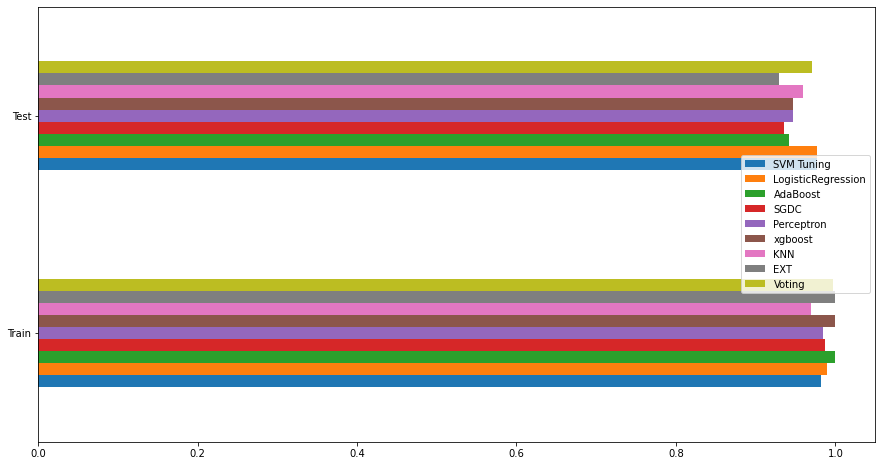

In [31]:

scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))